In [2]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np # linear algebra
import matplotlib as mpl
import matplotlib.pyplot as plt
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
from pyspark.sql import SparkSession

%matplotlib inline

In [3]:
spark1 = SparkSession.builder.appName('Ops').getOrCreate()
#weergave movies
movies = pd.read_csv('movies/movie.csv', sep=',')
#users =  spark1.read.csv('users/users.csv')
#movies = spark1.read.csv('movies/movie.csv')
#movies.show()



In [8]:
tags = pd.read_csv('movies/tag.csv', sep=',')
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18


In [4]:
ratings = pd.read_csv('movies/rating.csv', sep=',', parse_dates=['timestamp'])
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [37]:
# aantal films per genre
genre_counts = movies['genres'].value_counts()
genre_counts[:20].plot(kind='bar', figsize=(20,5))

TypeError: 'Column' object is not callable

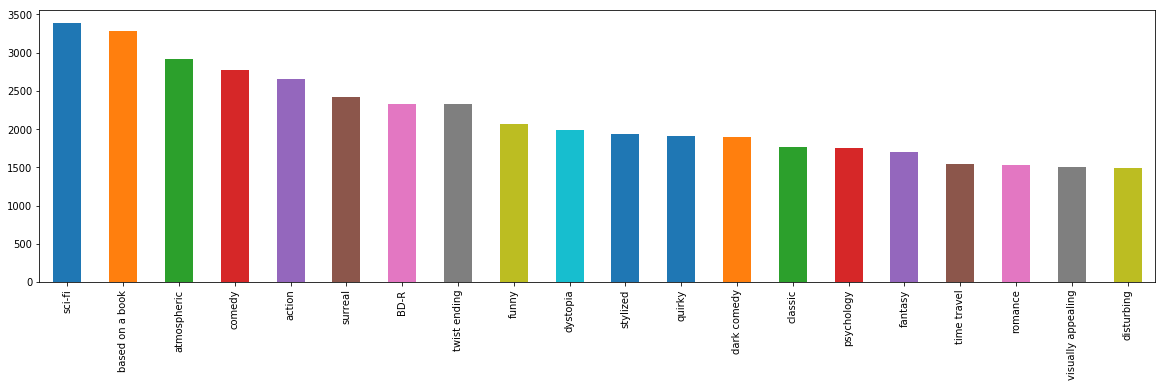

In [9]:
# meest gebruikte tags bij een films
tag_counts = tags['tag'].value_counts()
tag_counts[:20].plot(kind='bar', figsize=(20,5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023B8344CEF0>]],
      dtype=object)

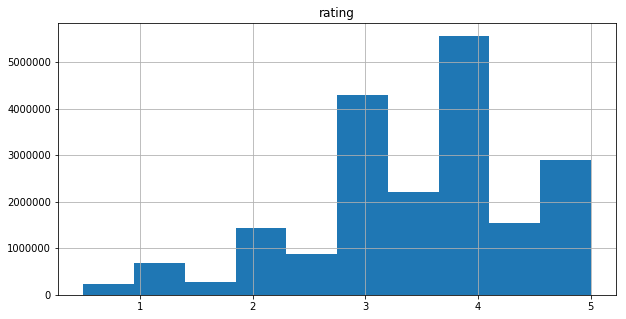

In [10]:
#laat de hoeveelheid ratings zien per rating
ratings.hist(column='rating', figsize=(10,5))

Text(0, 0.5, 'Aantal Films')

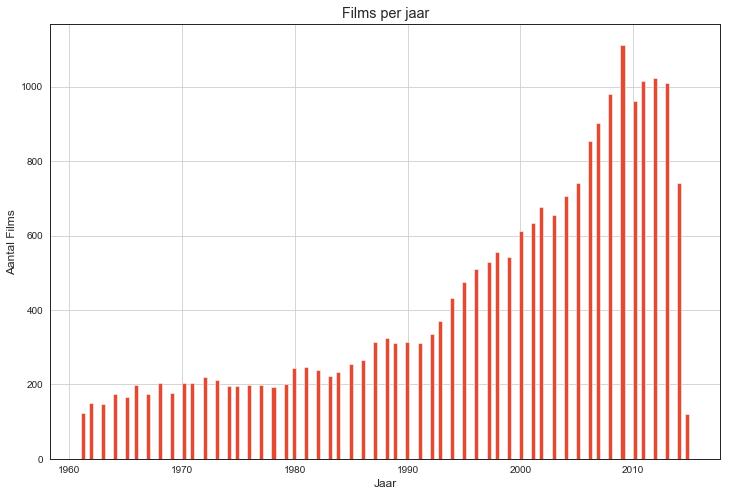

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
# select plot style
plt.style.use('ggplot')
# import libraries
sns.set_style('white')
%matplotlib inline
# split title and release year in separate columns
movies['year'] = movies.title.str.extract("\((\d{4})\)", expand=True) #nieuwe table
movies.dropna(inplace=True) #null values wegdoen
year_asint = movies['year'].astype(int)
# add the int(year) column  
movies.drop(['year'], inplace = True, axis = 1)
movies['year'] = year_asint
# the graph indicates that most of the movies have less than 40000 ratings
# most movies have been released after 1990
plt.figure(figsize=(12,8))
movies[movies['year'] > 1960]['year'].hist(bins=150)
plt.title('Films per jaar')
plt.xlabel('Jaar')
plt.ylabel('Aantal Films')


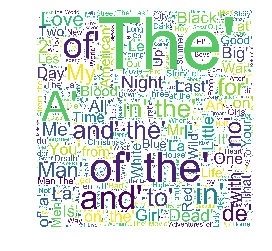

In [55]:
#meest gebruikte woorden in titles van films
movie_title_words = movies["title"].str.split(" ")
woorden = []
for value in movie_title_words:
    for word in value:
        woorden.append(word)
    
wordcloud = WordCloud(width=3000, height=3000,font_path ='C:/windows/Fonts/Arial.ttf',
                          background_color='white',
                          #stopwords=stopwords,
                          max_words=500,
                          max_font_size=1000, 
                          random_state=42
                         ).generate(str(woorden))
fig = plt.figure(2)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

In [12]:
average_rating = ratings[['movieId','rating']].groupby('movieId').mean()
average_rating.head()


,rating
movieId,
1,3.921240
2,3.211977
3,3.151040
4,2.861393
5,3.064592
